<a href="https://colab.research.google.com/github/gmae199boy/ai_deeplearning/blob/main/deep_learning_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 밑바닥부터 시작하는 딥러닝


In [2]:
%cd drive/MyDrive/deep-learning/

[Errno 2] No such file or directory: 'drive/MyDrive/deep-learning/'
/content/drive/MyDrive/deep-learning


## 퍼셉트론
- 가중치와 편향
  - 세타에 -b를 넣으면 x1w1 + x2w2 + b <= 0 == 0, x1w1 + x2w2 + b > 0 == 1이 된다
- 퍼셉트론은 직선만 그릴 수 있으므로 XOR은 나타낼 수 없다 -> 비선형이기 때문에
  - x1, x2가 NAND, OR 게이트에 입력되고, NAND, OR의 출력이 AND로 입력되면 XOR게이트 완성
  - 다층 퍼셉트론

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# 이 값이 0보다 작거나 같으면 0, 크면 1
def AND(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.7
  tmp = np.sum(w*x) + b
  if tmp <= 0:
    return 0
  else:
    return 1

def NAND(x1, x2):
  x = np.array([x1, x2])
  w = np.array([-0.5, -0.5]) # AND와는 가중치(x, b)만 다르다
  b = 0.7
  tmp = np.sum(w*x) + b
  if tmp <= 0:
    return 0
  else:
    return 0

def OR(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.2
  tmp = np.sum(w*x) + b
  if tmp <= 0:
    return 0
  else:
    return 1

def XOR(x1, x2):
  s1 = NAND(x1, x2)
  s2 = OR(x1, x2)
  y = AND(s1, s2)
  return y
  

## 신경망
- 퍼셉트론의 단점(가중치를 수동으로 설정)을 자동으로 학습하게 해주는것
- 활성화 함수 (activation function)
  -  y = h(b + w1x1 + w2x2)
  - h(x) = 0 (x <= 0), 1 (x > 0)
  - h(x)를 활성화 함수라 한다
  - a = b + w1x1 + w2x2, y = h(a)
  - 신경망의 동작을 더명확히 드러내고자 할 때는 활성화 처리과정을 노드에 그린다
- 계단 함수 (step function)
  - 임계값을 경계로 출력이 바뀌는 함수 (활성화 함수)
  - 그래서 퍼셉트론에서는 활성화 함수로 계단 함수를 이용한다
- 활성화 함수는 여러 함수중 계단 함수를 사용하고 있음
- 활성화 함수를 계단 함수에서 다른 함수로 변경하는 것이 신경망의 세계로 가는 길
- 시그모이드 함수 (sigmoid function)
  - h(x) = 1 / 1 + exp(-x)
  - 신경망에서는 활성화 함수로 시그모이드 함수를 사용해 신호를 변환, 다음 뉴런에 전달
  - 퍼셉트론과 신경망의 주된 차이는 활성화 함수가 다르다는 것 뿐

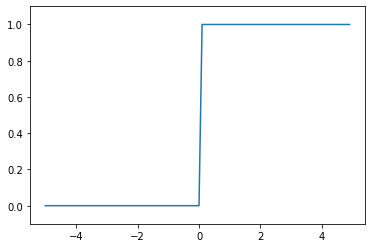

In [ ]:
# 계단 함수
# def step_function(x):
#   if x > 0:
#     return 1
#   else:
#     return 0

def step_function(x):
  return np.array(x > 0, dtype = np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()


- 이렇게 생겼기 때문에 계단 함수라 불림

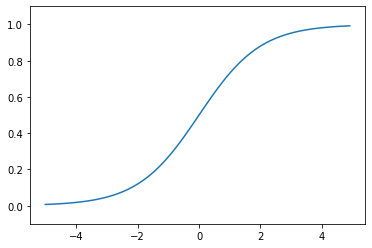

In [ ]:
# 시그모이드 함수
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

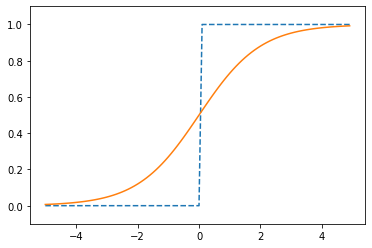

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y, linestyle="--")
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

- 시그모이드의 이런 입력에 따라 출력이 연속적으로 변화하는 매끄러움이 신경망 학습에서 ***아주 중요***하다
- 퍼셉트론에선 0 ,1이 흘렀다면 신경망에서는 연속적인 실수가 흐른다
- 둘 다 입력이 커지면 출력이 1에 가까워지고 반대인 경우는 0에 가까워지고 0, 1사이의 값만 반환한다는 것이 공통점
- 둘 다 비선형 함수이다
- 신경망은 층을 깊게 해야 하기 때문에 선형함수를 사용할 수 없다
 

- ReLU (rectified Linear Unit, 렐루) 함수
  - 시그모이드는 오래전부터 사용해왔으나, 최근에는 렐루를 주로 사용함
  - 렐루는 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하이면 0을 출력한다
  - h(x) = x (x > 0), 0 (x <= 0)


In [ ]:
# ReLU 함수
def relu(x):
  return np.maximum(0, x) # maximum은 두 입력 값 중 큰 값을 반환

# np.ndim(x) -> 배열의 차원 수

- 3층 신경망

In [ ]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

A1 = np.dot(X, W1) + B1

Z1 = sigmoid(A1)

print(Z1) # 1층

W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

print(Z2) # 2층

# 항등 함수
def identity_function(x):
  return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3

y = identity_function(A3)
print(y)

[0.57444252 0.66818777 0.75026011]
[0.62624937 0.7710107 ]
[0.31682708 0.69627909]


- 출력층의 활성화 함수는 풀고자 하는 문제의 성질에 맞게 정함
  - 회귀 -> 항등 함수
  - 2클래스 분류 -> 시그모이드
  - 다중클래스 -> 소프트맥스

### 정리

In [ ]:
def init_network():
  network = {}
  network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
  network['b1'] = np.array([0.1, 0.2, 0.3])
  network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
  network['b2'] = np.array([0.1, 0.2])
  network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
  network['b3'] = np.array([0.1, 0.2])

  return network

# backward(역방향)도 있음
# forward는 (순방향)
def forward(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = identity_function(a3)

  return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


- 소프트맥스 함수 (softmax function)
  - 오버플로우의 문제가 있다
  - 분수에 상수 C를 곱하면 결과는 결국 같기 때문에 ak에 c를 더한다
  - 입력 신호 중 최댓값을 대입한다
  - 소프트맥스의 출력 총합은 항상 1이다. 그래서 출력을 ***확률***로 해석할 수 있다
  - 소프트맥스를 적용해도 원소간의 대소관계는 변하지 않는다. a에서 2번째 원소가 제일 크다면 y에서 제일 큰 원소도 2번째이다. 그래서 신경망으로 분류를 할때는 출력층의 소프트맥스 함수를 생략해도 된다.
  - 학습과 추론 단계가 있는데, 추론 단계에서는 함수를 생략하는 것이 일반적이지만 학습시킬 때에는 출력층에서 함수를 사용한다.

In [ ]:
# 오버플로우를 염두에 두지 않은 식
def softmax_function(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

In [ ]:
# 오버플로우를 막는 식
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a - c)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

- 출력층의 뉴런 수
  - 분류에서는 분류하고 싶은 클래스 수로 설정하는 것이 일반적
  - 밑의 예는 입력층 뉴런이 784개 이다. 이는 이미지 크기가 28 * 28 = 784 이기 때문이다.
  - 출력층은 10개 이다. 숫자 0 ~ 9까지를 구분하는 문제이기 때문.
  - 은닉층은 2개로 첫 번째 은닉층은 50개의 뉴런, 두 번째는 100개의 뉴런. 이것은 임의로 정한 값

In [ ]:
import sys, os
sys.path.append(os.pardir) # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist
from PIL import Image
import pickle

def get_data():
  (x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False, one_hot_label=False)
  return x_test, t_test

def init_network():
  with open("ch03/sample_weight.pkl", 'rb') as f:
    network = pickle.load(f)
  return network

def predict(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = softmax(a3)

  return y

In [ ]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    # 이건 일반 용
    # pil_img.show()

    # 이건 구글 코랩용
    display(pil_img)

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
print(img.shape)  # (28, 28)

img_show(img)
# plt.imshow(img)
# plt.show()


5
(784,)
(28, 28)


In [ ]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
  y = predict(network, x[i])
  p = np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다
  if p == t[i]:
    accuracy_cnt += 1

print("Accuracy: " + str(float(accuracy_cnt) / len(x)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy: 0.9207


- 0 ~ 1의 범위로 만드는것 -> 정규화 (max 값을 나누면 됨)
- 신경망의 입력 데이터에 특정 변환을 가하는 것 -> 전처리
- 배치 (batch)
  - 여러개의 입력 데이터를 하나로 묶은 것(묶음)
  - 수치 계산 라이브러리들은 큰 배열을 효율적으로 처리할 수 있어서 사용
  - 커다란 신경망에서는 데이터 전송이 병목으로 작용하는 경우가 자주 있어, 배치 처리를 함으로써 버스에 주는 부하를 줄일 수 있어 사용
  - 큰 배열을 한꺼번에 처리하는 것이 분할된 작은 배열을 여러 번 처리하는 것 보다 빠름

In [ ]:
batch_size = 100 # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
  x_batch = x[i:i + batch_size]
  y_batch = predict(network, x_batch)
  p = np.argmax(y_batch, axis=1)
  accuracy_cnt += np.sum(p == t[i: i + batch_size])

print("Accurary: " + str(float(accuracy_cnt) / len(x)))

Accurary: 0.9207


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


## 신경망 학습

- 학습: 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것
- 손실 함수: 신경망이 학습할 수 있도록 해주는 지표
- 경사법: 여기서는 손실 함수의 값을 가급적 작게 만드는 기법으로, 함수의 기울기를 활용함
- 특징(feature): 이미지에서 특징을 추출하고 그 특징의 패턴을 기계학습 기술로 학습시킴
  - 입력 데이터(입력 이미지)에서 본질적인 데이터(중요한 데이터)를 정확하게 추출할 수 있도록 설계된 변환기
  - 이미지의 특징은 보통 ***벡터***로 기술하고, 컴퓨터 비전 분야에서는 ***SIFT, SURF, HOG*** 등의 특징을 사용
  - 이런 특징을 사용하여 이미지 데이터를 벡터로 변환, 변환된 벡터로 ***지도 학습 방시***의 대표 분류 기법인 ***SVM, KNN*** 등으로 학습
  - 벡터로 변환할 때 사용하는 특징은 여전히 ***사람***이 설계
  - 그러므로 문제에 ***적합한 특징***을 쓰지 않으면 좋은 결과를 못 얻음
  - 사람이 적절한 특징을 생각해야 함
- 신경망은 사람이 개입하지 않고 기계가 이미지를 ***있는 그대로*** 이미지에 포함된 중요한 특징까지 학습함
  - 종단간 기계학습 = 딥러닝 이라고도 함(end-to-end)
- 훈련데이터와 시험 데이터
  - 우선 훈련 데이터만 사용하여 학습하면서 최적의 매개변수를 찾음
  - 다음 시험 데이터를 사용해 앞서 훈련한 모델의 실력을 평가
- 범용 능력: 아직 보지 못한 데이터(훈련 데이터에 포함되지 않는 데이터)로도 문제를 올바르게 풀어내는 능력
- 오버 피팅(overfitting): 한 데이터셋에만 지나치게 최적화된 상태 -> 피해야 하는게 중요한 과제

### 손실 함수
- 현재의 상태를 ***하나의 지표***로 표현